Descriptive statistics:
        Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
count  200.000000        200.000000           200.000000   
mean   100.500000        147.042500            23.264000   
std     57.879185         85.854236            14.846809   
min      1.000000          0.700000             0.000000   
25%     50.750000         74.375000             9.975000   
50%    100.500000        149.750000            22.900000   
75%    150.250000        218.825000            36.525000   
max    200.000000        296.400000            49.600000   

       Newspaper Ad Budget ($)   Sales ($)  
count               200.000000  200.000000  
mean                 30.554000   14.022500  
std                  21.778621    5.217457  
min                   0.300000    1.600000  
25%                  12.750000   10.375000  
50%                  25.750000   12.900000  
75%                  45.100000   17.400000  
max                 114.000000   27.000000  


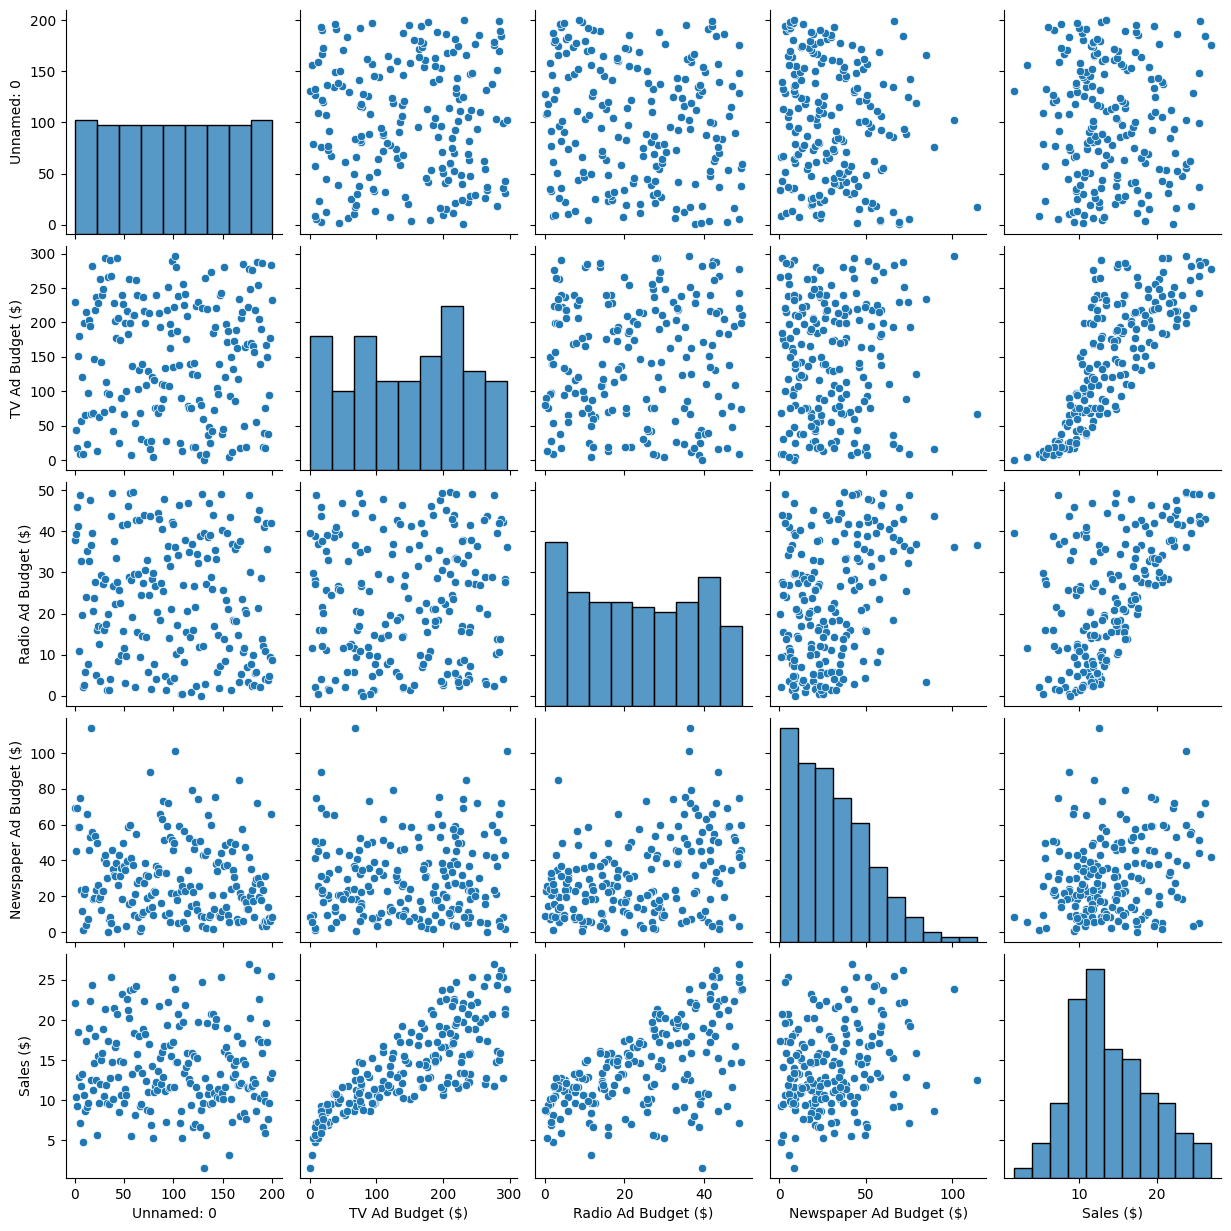

Correlation matrix:
                          Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
Unnamed: 0                 1.000000          0.017715            -0.110680   
TV Ad Budget ($)           0.017715          1.000000             0.054809   
Radio Ad Budget ($)       -0.110680          0.054809             1.000000   
Newspaper Ad Budget ($)   -0.154944          0.056648             0.354104   
Sales ($)                 -0.051616          0.782224             0.576223   

                         Newspaper Ad Budget ($)  Sales ($)  
Unnamed: 0                             -0.154944  -0.051616  
TV Ad Budget ($)                        0.056648   0.782224  
Radio Ad Budget ($)                     0.354104   0.576223  
Newspaper Ad Budget ($)                 1.000000   0.228299  
Sales ($)                               0.228299   1.000000  


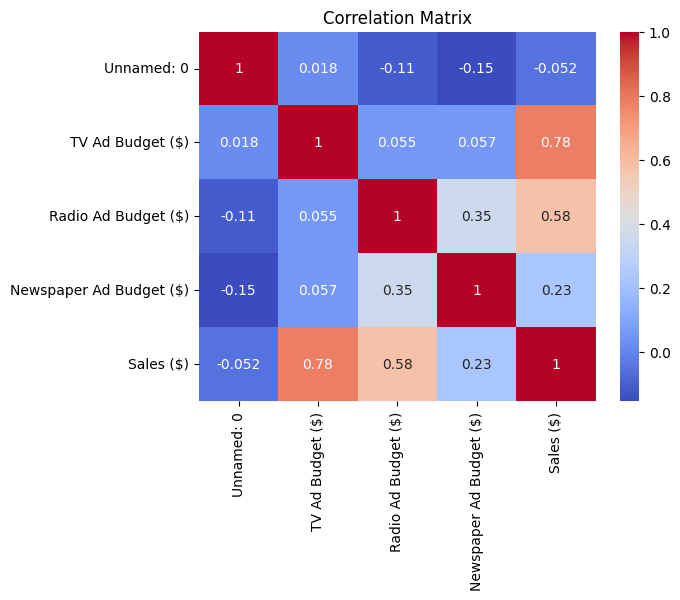

Mean Squared Error: 3.1740973539761033
Root Mean Squared Error: 1.78159966153345
R-squared: 0.899438024100912


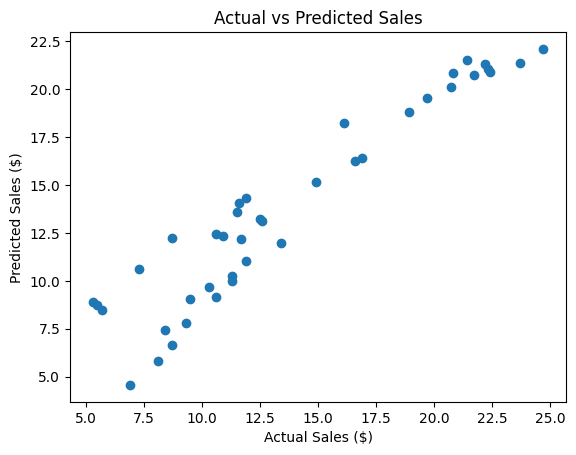

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Cleaning
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("U:\DATASETS\Dataset.csv")  # Replace "DataSet.csv" with the actual filename

# Check for missing values and handle them appropriately
missing_values = df.isnull().sum()
if missing_values.any():
    df = df.dropna()  # Removing rows with missing values, you can replace this with your preferred method
# Ensure that all data types are appropriate for analysis

# Step 2: Exploratory Data Analysis (EDA)
# Perform descriptive statistics to understand the distribution of variables
print("Descriptive statistics:\n", df.describe())

# Visualization
sns.pairplot(df)
plt.show()

# Step 3: Correlation Analysis
# Calculate correlation coefficients between predictor variables and target variable
correlation_matrix = df.corr()
print("Correlation matrix:\n", correlation_matrix)

# Visualize correlations using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Step 4: Implementing Linear Regression Algorithm
# Separate the dataset into predictor variables (X) and the target variable (y)
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the linear regression algorithm using Ordinary Least Squares (OLS) method
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Step 5: Evaluation of the Model
# Predict the target variable using the trained model on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales ($)")
plt.ylabel("Predicted Sales ($)")
plt.title("Actual vs Predicted Sales")
plt.show()
